In [2]:
%store -r chestnut
%store -r chestnut1
%store -r chestnut2
%store -r chestnut3
#https://arxiv.org/pdf/1508.01615.pdf

In [18]:
min(chestnut2)

0.246

In [3]:
%store -r sunshine
%store -r rainbow

%store -r sunshine1
%store -r rainbow1

%store -r sunshine2
%store -r rainbow2

%store -r sunshine3
%store -r rainbow3

%store -r runaways2

In [4]:
import numpy as np
from numpy import *
from numpy import nan
import statistics
import os
import matplotlib.pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
# %pylab
# pd.set_option('display.mpl_style', 'default')
# import scipy.integrate
plt.style.use(astropy_mpl_style)

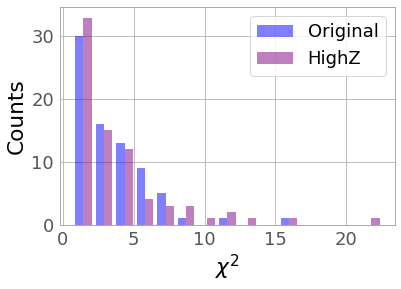

In [36]:
# plt.hist(chestnut)
plt.hist([chestnut,chestnut1],bins=15,alpha=0.5,color=['blue','purple'],label=['Original','HighZ'])
plt.legend()
plt.xlabel(r'$\chi^2$')
plt.ylabel('Counts')
plt.savefig('Chestnuts',bbox_inches='tight')

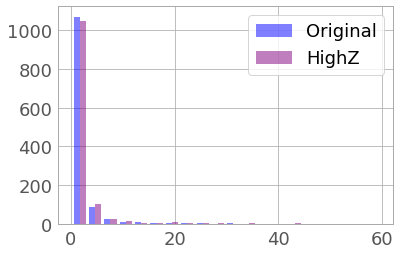

In [37]:
plt.hist([chestnut2,chestnut3],bins=20,alpha=0.5,color=['blue','purple'],label=['Original','HighZ'])
plt.legend()
plt.savefig('Chestnuts-Full',bbox_inches='tight')

In [7]:
# lmao=np.array(log10(sunshine))/np.array(log10(sunshine1))
cov = mean((np.array(log10(sunshine))- mean(np.array(log10(sunshine))))*(np.array(log10(sunshine1))- mean(np.array(log10(sunshine1)))))
Pearson_EELG_SM=cov/(statistics.stdev(np.array(log10(sunshine)))*(statistics.stdev(np.array(log10(sunshine1)))))
Pearson_EELG_SM

0.9142964093094031

In [8]:
cov1 = mean((np.array(log10(sunshine2))- mean(np.array(log10(sunshine2))))*(np.array(log10(sunshine3))- mean(np.array(log10(sunshine3)))))
Pearson_G_SM=cov1/(statistics.stdev(np.array(log10(sunshine2)))*(statistics.stdev(np.array(log10(sunshine3)))))
Pearson_G_SM

0.9902741982939716

In [9]:
cov2 = mean((np.array(log10(rainbow))- mean(np.array(log10(rainbow))))*(np.array(log10(rainbow1))- mean(np.array(log10(rainbow1)))))
Pearson_EELG_SFR=cov2/(statistics.stdev(np.array(log10(rainbow)))*(statistics.stdev(np.array(log10(rainbow1)))))
Pearson_EELG_SFR

0.8054481475737298

In [10]:
cov3 = mean((np.array(log10(rainbow2))- mean(np.array(log10(rainbow2))))*(np.array(log10(rainbow3))- mean(np.array(log10(rainbow3)))))
Pearson_G_SFR=cov3/(statistics.stdev(np.array(log10(rainbow2)))*(statistics.stdev(np.array(log10(rainbow3)))))
Pearson_G_SFR

0.9503017218947379

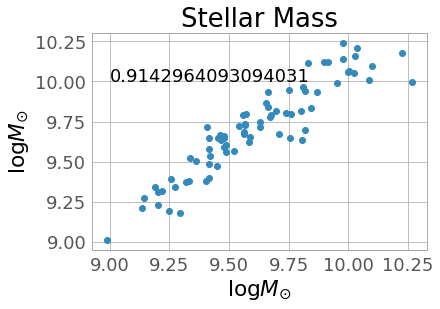

In [38]:
plt.scatter(log10(sunshine),log10(sunshine1))
plt.title('Stellar Mass')
plt.xlabel('log$M_{\odot}$')
plt.ylabel('log$M_{\odot}$')
plt.annotate(Pearson_EELG_SM,xy=(9,10))
plt.savefig('Stellar Mass Scatter',bbox_inches='tight')
# plt.plot(1,1)

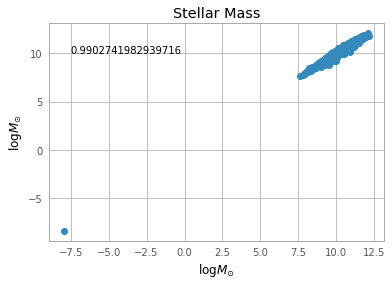

In [12]:
plt.scatter(log10(sunshine2),log10(sunshine3))
plt.title('Stellar Mass')
plt.xlabel('log$M_{\odot}$')
plt.ylabel('log$M_{\odot}$')
plt.annotate(Pearson_G_SM,xy=(-7.5,10))
plt.savefig('Stellar Mass Scatter Full')

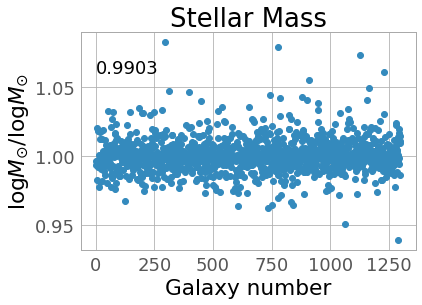

In [39]:
lmaokai=np.array(log10(sunshine2))/np.array(log10(sunshine3))
# lmao =sunshine/sunshine1
plt.scatter(linspace(1,1300,1226),lmaokai)
plt.title('Stellar Mass')
plt.xlabel('Galaxy number')
plt.ylabel('log$M_{\odot}$/log$M_{\odot}$')
plt.annotate(round(Pearson_G_SM,4),xy=(0,1.06))
plt.savefig('SM diff Full',bbox_inches='tight')

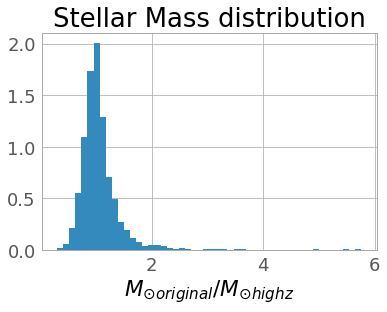

In [50]:
lmaokai2=np.array(sunshine2)/np.array(sunshine3)
plt.hist(lmaokai2,bins=50, density=True)
plt.title('Stellar Mass distribution')
plt.xlabel(r'$M_{\odot original}/M_{\odot highz}$')
# plt.xticks([0,0.5,1,1.5,2])

plt.savefig('z_spec galaxy SM distribution not log',bbox_inches='tight')
plt.show()

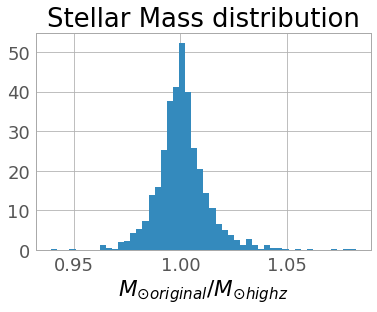

In [51]:
plt.hist(lmaokai,bins=50, density=True)
plt.title('Stellar Mass distribution')
plt.xlabel(r'$M_{\odot original}/M_{\odot highz}$')
# plt.xticks([0,0.5,1,1.5,2])

plt.savefig('z_spec galaxy SM distribution',bbox_inches='tight')
plt.show()

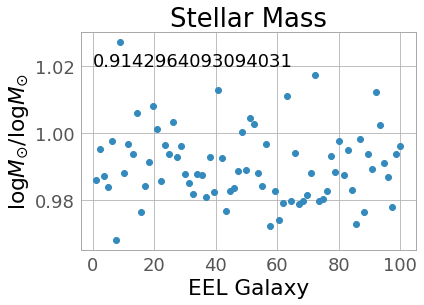

In [41]:
lmao=np.array(log10(sunshine))/np.array(log10(sunshine1))
# lmao =sunshine/sunshine1
plt.scatter(linspace(1,100,76),lmao)
plt.title('Stellar Mass')
plt.xlabel('EEL Galaxy')
plt.ylabel('log$M_{\odot}$/log$M_{\odot}$')
plt.annotate(Pearson_EELG_SM,xy=(0,1.02))
plt.savefig('SM diff',bbox_inches='tight')

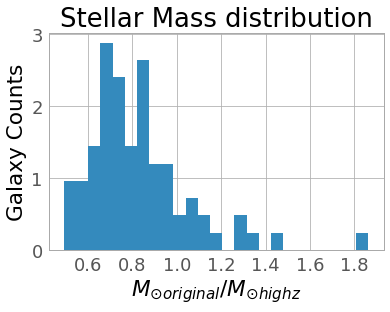

In [68]:
lmao2=np.array(sunshine)/np.array(sunshine1)
fig, ax = plt.subplots()

plt.hist(lmao2,bins=25, density=True)
mpl.rcParams.update({'font.size': 18})
plt.title('Stellar Mass distribution')
plt.xlabel(r'$M_{\odot original}/M_{\odot highz}$')
plt.ylabel('Galaxy Counts')
loc = mpl.ticker.MultipleLocator(base=0.2) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.savefig('EELG SM divergence not log',bbox_inches='tight')
plt.show()

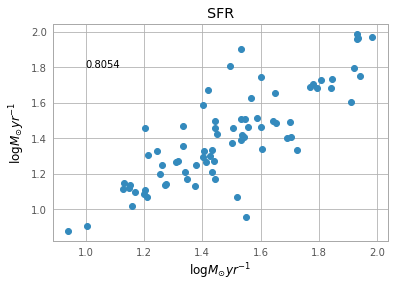

In [23]:
plt.scatter(log10(rainbow),log10(rainbow1))
plt.title('SFR')
plt.xlabel('log$M_{\odot}yr^{-1}$')
plt.ylabel('log$M_{\odot}yr^{-1}$')
plt.annotate(round(Pearson_EELG_SFR,4),xy=(1,1.8))
plt.savefig('SFR Scatter')

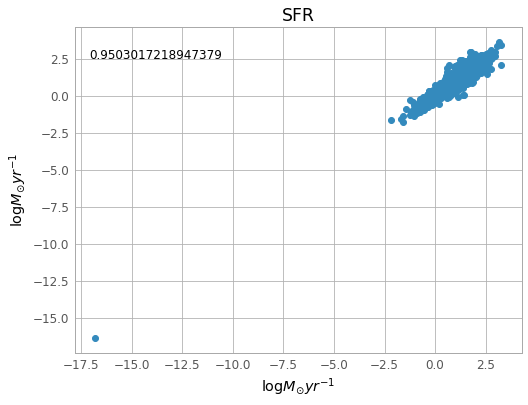

In [70]:
plt.scatter(log10(rainbow2),log10(rainbow3))
plt.title('SFR')
plt.xlabel('log$M_{\odot}yr^{-1}$')
plt.ylabel('log$M_{\odot}yr^{-1}$')
plt.annotate(Pearson_G_SFR,xy=(-17.1,2.5))
plt.savefig('SFR Scatter Full')

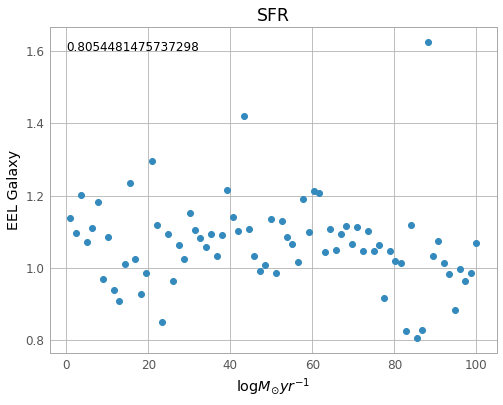

In [71]:
roflmao=np.array(log10(rainbow))/np.array(log10(rainbow1))
# lmao =sunshine/sunshine1
plt.scatter(linspace(1,100,76),roflmao)
plt.title('SFR')
plt.xlabel('log$M_{\odot}yr^{-1}$')
plt.ylabel('EEL Galaxy')
plt.annotate(Pearson_EELG_SFR,xy=(0,1.60))
plt.savefig('SFR diff')

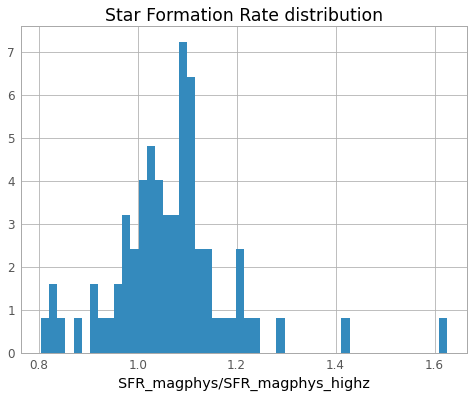

In [73]:
plt.hist(roflmao,bins=50, density=True)
plt.title('Star Formation Rate distribution')
plt.xlabel('SFR_magphys/SFR_magphys_highz')
plt.show()

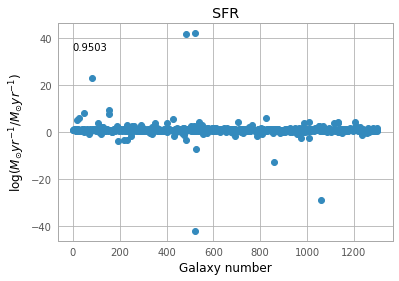

In [26]:
roflmaokai=np.array(log10(rainbow2))/np.array(log10(rainbow3))
# lmao =sunshine/sunshine1
plt.scatter(linspace(1,1300,1226),roflmaokai)
plt.title('SFR')
plt.xlabel('Galaxy number')
plt.ylabel('log($M_{\odot}yr^{-1}$/$M_{\odot}yr^{-1}$)')
plt.annotate(round(Pearson_G_SFR,4),xy=(0,35))
plt.savefig('SFR diff Full')

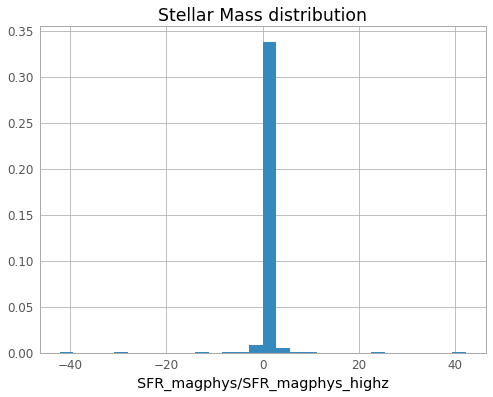

In [76]:
plt.hist(roflmaokai,bins=30, density=True)
plt.title('Stellar Mass distribution')
plt.xlabel('SFR_magphys/SFR_magphys_highz')
plt.show()

In [28]:
# len(roflmaokai)

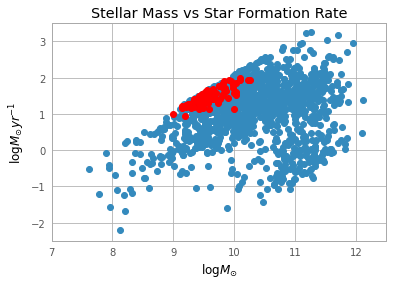

In [25]:
#sunshine=magphys, sunshine1=highz, sunshine2=mag2, sunshine3=high2 (SM)
#rainbow=magphys, rainbow1=highz, rainbow2=mag2, rainbow3=high2 (SFR)
plt.scatter(log10(sunshine2),log10(rainbow2))
plt.scatter(log10(sunshine),log10(rainbow),c='red')#EELG
plt.ylim(-2.5,3.5)
plt.xlim(7,12.5)
plt.ylabel('log$M_{\odot}yr^{-1}$')
plt.xlabel('log$M_{\odot}$')
plt.title('Stellar Mass vs Star Formation Rate')
plt.savefig('SM vs SFR magphys')

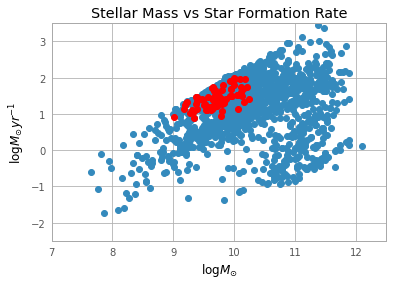

In [26]:
plt.scatter(log10(sunshine3),log10(rainbow3))
plt.scatter(log10(sunshine1),log10(rainbow1),c='red')#EELG
plt.ylim(-2.5,3.5)
plt.xlim(7,12.5)
plt.ylabel('log$M_{\odot}yr^{-1}$')
plt.xlabel('log$M_{\odot}$')
plt.title('Stellar Mass vs Star Formation Rate')
plt.savefig('SM vs SFR highz')

In [15]:
print(len(chestnut1))
len(chestnut)

76


76

In [16]:
print(chestnut)

[1.465, 4.611, 3.906, 1.676, 1.305, 5.193, 6.896, 1.29, 3.082, 4.346, 2.789, 3.633, 15.977, 4.327, 4.947, 2.596, 1.624, 3.01, 4.021, 3.625, 2.238, 1.833, 1.089, 3.342, 8.355, 2.118, 5.498, 1.825, 2.577, 7.905, 0.99, 1.278, 1.312, 1.693, 1.878, 1.419, 5.266, 0.724, 4.665, 2.87, 3.607, 5.501, 1.78, 3.707, 7.653, 4.604, 1.258, 4.147, 6.112, 5.37, 2.791, 2.042, 6.977, 3.497, 6.454, 7.667, 4.788, 5.977, 6.311, 1.034, 1.905, 1.596, 1.82, 0.955, 11.258, 1.34, 2.899, 2.132, 1.495, 1.365, 1.792, 2.287, 3.682, 1.743, 2.336, 3.322]


In [17]:
print(chestnut1)

[1.302, 3.029, 4.663, 1.659, 2.054, 5.61, 11.977, 0.826, 2.416, 2.169, 3.711, 3.791, 22.496, 2.999, 2.793, 4.19, 1.207, 3.895, 8.083, 1.548, 1.088, 1.967, 1.077, 2.187, 7.765, 2.886, 2.463, 1.402, 4.596, 8.656, 1.777, 1.442, 1.564, 1.609, 2.865, 1.796, 9.521, 1.076, 5.197, 1.813, 3.135, 12.697, 1.797, 3.657, 7.3, 3.997, 1.862, 2.349, 6.243, 6.602, 2.031, 2.052, 5.124, 3.293, 3.378, 8.595, 1.139, 11.026, 3.706, 1.009, 1.604, 1.813, 1.771, 1.45, 15.999, 1.049, 3.412, 3.312, 0.864, 1.02, 1.686, 3.806, 3.644, 1.348, 2.469, 3.904]


In [18]:
chestnut.index(max(chestnut))

12

In [19]:
chestnut1.index(max(chestnut1))
#11999

12

In [20]:
chestnut.index(min(chestnut))

37

In [31]:
print(min(runaways2))
print(max(runaways2))

0.0
5.7913


In [39]:
print(sort(runaways2)[60])

0.276


In [21]:
chestnut3.index(min(chestnut3))

558